# Case Study on Probability for Data Science

### Problem Statement:  

To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [57]:
#Importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset 

In [58]:
data = pd.read_csv('mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [59]:
data.shape

(8124, 23)

### Data Preprocessing

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [61]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [62]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [63]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [64]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [65]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [66]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

### Encode categorical data

In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [106]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [107]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [108]:
X = data.drop(['class'], axis=1)
y = data['class']

In [109]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [110]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

### Splitting the data into train and test 

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, test_size =0.2)

In [113]:
X_train.shape

(6499, 22)

### Scaling the data 

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [116]:
X_train.shape

(6499, 22)

### 1. Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
# fitting to x train and y train 
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy is :  0.9556923076923077
precision is :  0.9404466501240695
f1 score is :  0.9546599496221663


In [119]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[795,  48],
       [ 24, 758]], dtype=int64)

### 2.KNN Regression

In [120]:
from sklearn.neighbors import KNeighborsClassifier
# finding optimal k value
acc_val = []
neighbors = np.arange(3,15)

In [121]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors =k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    acc_val.append(score)

In [122]:
acc_val

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9987692307692307]

Text(0, 0.5, 'accuracy')

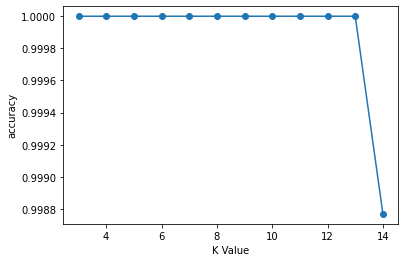

In [123]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [124]:
classifier =KNeighborsClassifier(n_neighbors = 3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [125]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy is :  1.0
precision is :  1.0
f1 score is :  1.0


### 3.Random Forest

In [126]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
gc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=gc.predict(x_test)
gc.fit(X_train,y_train)
y_pred=gc.predict(X_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy is :  1.0
precision is :  1.0
f1 score is :  1.0


In [127]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

### 4.Naive Bayes Classification

In [128]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [129]:
y_pred_nb = nb.predict(X_test)

In [130]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy is :  1.0
precision is :  1.0
f1 score is :  1.0


In [131]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

### 5. Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [133]:
y_pred=dt.predict(X_test)

In [134]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy is :  1.0
precision is :  1.0
f1 score is :  1.0


In [135]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)